## Using one of the tools that we have discussed (matplotlib and/or pandas), we will construct a visualization of the Illinois Building Inventory that communicates the following information 

Here we import all the libraries needed for the below performed calculations

In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" # note, could also use like "sans-serif" others, just google

# lets also import numpy
import numpy as np
import pandas as pd
import csv

In [2]:
f = open("C:/Users/npali/Downloads/building_inventory.csv") # open the file in the stored location

Here we are reading the opened file using pandas and printing out the column names for better understanding of the dataset and converted the Nan values to 0 if any.

In [3]:
buildings = pd.read_csv("C:/Users/npali/Downloads/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0})
for col in buildings.columns: 
    print(col) 

Agency Name
Location Name
Address
City
Zip code
County
Congress Dist
Congressional Full Name
Rep Dist
Rep Full Name
Senate Dist
Senator Full Name
Bldg Status
Year Acquired
Year Constructed
Square Footage
Total Floors
Floors Above Grade
Floors Below Grade
Usage Description
Usage Description 2
Usage Description 3


In [4]:
summary = buildings.shape # this gives the shape of the dataframe i.e number of rows and number of columns
summary

(8862, 22)

In [5]:
buildings.head(2)

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


# 1. Relationship between the year acquired and the year constructed

In [6]:
buildings[['Year Acquired', 'Year Constructed']].head() # the columns between which relation needs to be defined

,Year Acquired,Year Constructed
0,1975.0,1975.0
1,2004.0,2004.0
2,2004.0,2004.0
3,2004.0,2004.0
4,2004.0,2004.0


In [7]:
buildings["Year Constructed"].min() # to understand the min values apart from 0

1753.0

In [8]:
buildings["Year Constructed"].max()

2019.0

In [9]:
buildings["Year Acquired"].min() # to understand the min values apart from 0

1753.0

In [10]:
buildings["Year Acquired"].max()

2019.0

#### The below Graph shows the relation between the Year Of Acquisition and the Year of Construction for a particular building.
* The grpah plotted used the various parameters like the x label, y label, title for the graph, colour of the points, x axis range, y axis range
* The graph plotted is a scatterplot and there are multiple point relations which describes the various relations between these two parameters.
* Here I have given the range for x-axis and y-axis based on the fact that there max and min value for these parameters is as defined.
* The graph also shows that the Year of Construction can be greater than , equal to or less than the Year of Acquisition. This means the building could have been constructed even before it was acquired. 

### Success points:
    I was able to succesfully define a clear and direct relation between the two parameters without any extensive data manupilation. The data plot gives us the outliers value as well. With the plot I can safely make an assumption that there has been a constanct process of building acquistion and construction as there was no ir-regularity in the graph. Also there were a lot of buildings that were acquired from 1950 to 2020 and a lot of them were constructed between 1900 to 1950
### Shortcomimg
    I still feel that there can be more done with this data by introducing more parameters in the relation. For example we can introduce Building status to check if the building is still in use or not and then define a relation with the year of construction based on that.

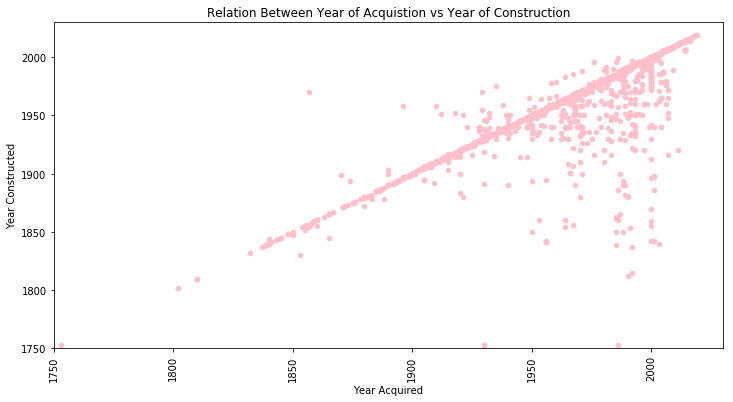

In [11]:
buildings.plot(x = "Year Acquired", y="Year Constructed", figsize=(12,6), rot=90, kind='scatter',
                    title ="Relation Between Year of Acquistion vs Year of Construction", c="pink", xlim=[1750,2030]
                      ,ylim=[1750,2030])

plt.show()

# 2. Total square footage as a function of congressional district

In [14]:
# total sum of the square footage of the buildings in a particular congressional district 
congressional_data = buildings.groupby("Congress Dist")["Square Footage"].sum()

#### The graph shows the direct relation between the square Total square footage of a building vs the Congressional district
* Here i have used the line graph to plot direct relation between the total values of the square footage of each building a particular congressional district.
* Again I haved used style graphs , markers, line width, grid background, title, label-styling to enhance the graph. I have removed the log values from the yaxis to keep the data in plain numeric format.

### Success points:
    By calculating the sum of all the building's area(square footage) and mapping it against the particualr Congress district I could succesfully define which has the largest area alloted at their disposal. Here I can clearly see that on paper that Congress dist = 13 has the largest area alloted to it and after that it is Congress Dist = 7. ALso there is substancially large difference between these two values. Also the lowest value is for Congress Dist = 6 and again the difference between max and min points is very large.
### Shortcomimg
    Which implementing the graph I wanted to use the xticks() function to change the intervals for the x- axis and I was not able to do that successfully. I still feel that there can be more done with this data by introducing more parameters in the relation. For example we can introduce Building status to check if the building is still in use or not and then we can figure out if the area which is so high in number is actually in use or not. Also I can check which agency has the max area alloted to them by introducing Agency Name.

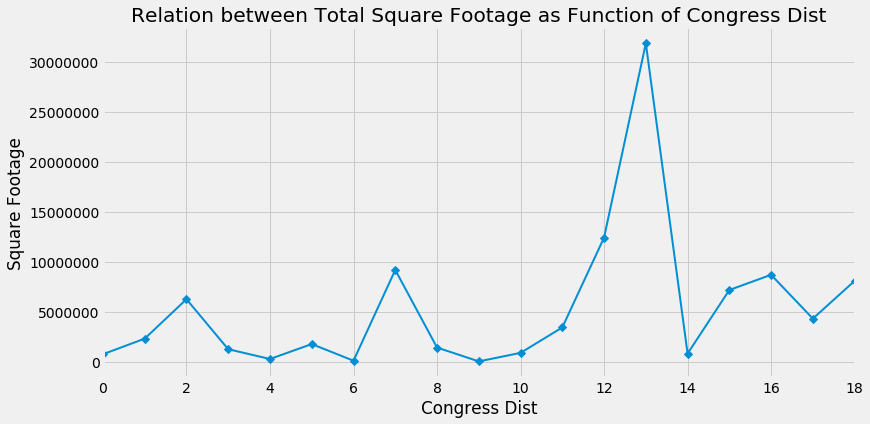

In [15]:
style = 'fivethirtyeight'  # styletype
with plt.style.context(style): 
    congressional_data.plot(x = "Congress Dist", y ="Square Footage", marker ='D',lw =2, figsize=(12,6), kind='line',grid = True, 
                    title ="Relation between Total Square Footage as Function of Congress Dist")
plt.ticklabel_format(style = 'plain') # to remove the log values from axis
plt.ylabel("Square Footage")
plt.xlabel("Congress Dist")
plt.show()

# 3. Average square footage per floor as a function of congressional district

In [16]:
# replacing all the 0 floor values in the floor column by Nan as I have to use this column for division
buildings["Total Floors"] = buildings["Total Floors"].replace(0,np.nan) 

In [17]:
# Calculating Avg square footage per floor for every building 
buildings["Average Square Footage"] = buildings["Square Footage"] / buildings["Total Floors"]

In [18]:
buildings[['Square Footage', 'Total Floors', 'Average Square Footage']].head()

,Square Footage,Total Floors,Average Square Footage
0,144.0,1.0,144.0
1,144.0,1.0,144.0
2,144.0,1.0,144.0
3,144.0,1.0,144.0
4,144.0,1.0,144.0


In [19]:
buildings["Average Square Footage"].sort_values().unique() # checking if there are any infinite values

array([9.00000e+00, 1.00000e+01, 1.20000e+01, ..., 1.70550e+05,
       3.18437e+05,         nan])

In [20]:
# Calculating the Average square footage per floor for every congressional district
aggregated_data_average = buildings.groupby("Congress Dist")["Average Square Footage"].mean()

In [21]:
buildings.groupby("Congress Dist")["Square Footage"].sum() # to check what sum() gives

Congress Dist
0       793124.0
1      2351762.0
2      6285684.0
3      1293687.0
4       317741.0
5      1809022.0
6       145659.0
7      9211651.0
8      1461548.0
9        77978.0
10      929267.0
11     3467894.0
12    12444775.0
13    31849251.0
14      857108.0
15     7209934.0
16     8725880.0
17     4347743.0
18     8120838.0
Name: Square Footage, dtype: float64

In [22]:
buildings.groupby("Congress Dist")["Square Footage"].mean() # to check what mean() gives

Congress Dist
0      4865.791411
1     53449.136364
2     20082.057508
3     35935.750000
4     28885.545455
5     39326.565217
6      5602.269231
7     83742.281818
8     13659.327103
9      7797.800000
10     6733.818841
11    15981.078341
12     7729.673913
13    21389.691739
14     3694.431034
15     4962.101858
16     8270.976303
17     6637.775573
18     7450.310092
Name: Square Footage, dtype: float64

#### Here I have defined a relation between the Average Square footage per floor Vs Congressional district.

* Here I have calualted the Average Square footage per foor for each building and then calculated the mean of that values for all the conngress dist and plotted it using the line graph.
* I have tried to use more varions to show the graph differently by selecting a dark background as compared to the previous ones. Also I have incresed the label fontsize for better clarity.

### Success points:
    By calculating the average square footage of all the building's area(per floor) and then calculating the mean value for that congress dist for average square footage per floor I could see the high and low points at 3 and 18 Congress dist  respectively. Also the average area is near about the same for 1 and 5 congregassional districts. Here also the difference between the high and low points was very prominant.
### Shortcomimg
    I want to implement this graph as bar plot as I feel this can help me to understand the numeric values more. Also I wanted to show the data points in the line graph which I want to learn more about. Just like the previosu graphs I feel more meaningful relations can be deciphered by introducing more parameters into this.

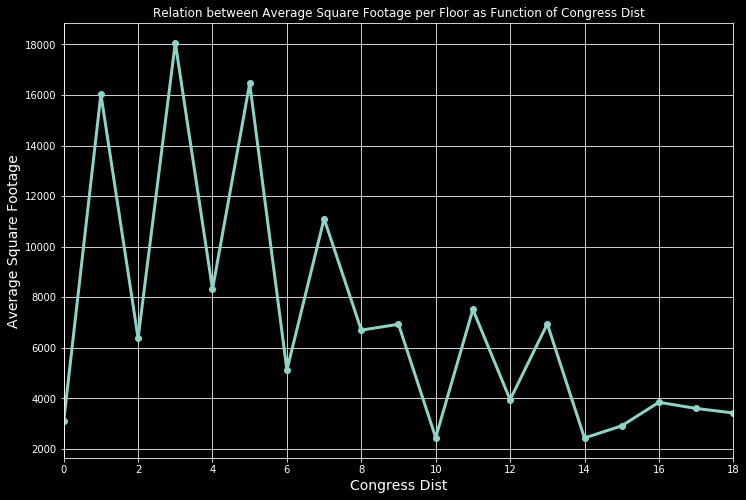

In [23]:
with plt.style.context('dark_background'):
    aggregated_data_average.plot(x = "Congress Dist", y ="Average Square Footage", marker ='o', figsize=(12,8), kind='line', 
                     grid = True, title ="Relation between Average Square Footage per Floor as Function of Congress Dist", lw=3)
plt.ticklabel_format(style = 'plain')
plt.ylabel("Average Square Footage", fontsize=14)
plt.xlabel("Congress Dist", fontsize=14)
plt.show()